# Some random text


In [243]:
# !pip install tensorflow-gpu

In [244]:
# !nvidia-smi

In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.__version__



'2.8.2'

In [247]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Group Project/depression.csv')
df

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,23,1,1,0,0,1,1,2,1,...,8,25.2,25.2,27.2,0,0,0,0,0,0
312,313,36,0,1,0,0,0,0,2,1,...,0,23.2,20.0,24.0,0,0,0,0,0,0
313,314,33,0,0,0,0,0,1,2,1,...,0,25.2,19.2,27.2,0,0,0,0,0,0
314,315,25,1,1,0,1,0,1,0,0,...,26,14.0,13.2,13.2,1,4,1,2,1,2


In [248]:
from collections import Counter
X = df
y = df['DASS_depression_severity']

X = X.drop(columns='DASS_depression_severity')

In [249]:
# print(f"Initial: {Counter(y)}")

In [250]:
# from imblearn.over_sampling import RandomOverSampler
# over = RandomOverSampler(sampling_strategy={0: 201, 1: 150, 2: 120, 3: 50, 4: 50})
# X, y = over.fit_resample(X, y)
# print(f"Oversampled: {Counter(y)}")

In [251]:
from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse=False)
# X[['Alone','Friends/Coursemates','Family']] = ohe.fit_transform(X['Living_with1'].values.reshape(-1,1))
# X[['< RM1000','RM1000 - 3000','> RM3000']] = ohe.fit_transform(X['Expenses'].values.reshape(-1,1))
# y = ohe.fit_transform(y.values.reshape(-1,1))
#with lda, one hot encoding is not needed
# X = X.drop(columns=['Living_with1','Expenses'])
# y

In [252]:
# print(X.columns)
X.drop(columns=['Code','Residence_high_COVID1','Living_with','Monthly_expenses',
                 'DASS_depression_numerical','DASS_anxiety_numerical','DASS_stress_numerical',
                 'DASS_depression_binary','DASS_anxiety_binary','DASS_anxiety_severity','DASS_stress_binary','DASS_stress_severity',
                 'Religion_binary','Med_or_not',
                 ],
        inplace=True, axis=1)
print(X.columns)

Index(['Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_help', 'Expenses', 'Living_with1', 'Worry_family',
       'Routine_loss', 'Class_hours', 'Stress_class_disrupted',
       'Medical_illness', 'Mental_illness', 'COVID_symptoms',
       'Residence_high_COVID', 'Quarantine', 'MSPSS_family', 'MSPSS_friends',
       'MSPSS_significant_others'],
      dtype='object')


In [253]:
#Split the dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [254]:
X_train.shape, y_train.shape

((221, 19), (221,))

In [255]:
X_test.shape, y_test.shape

((95, 19), (95,))

### Feature normalisation


In [256]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def featureNormalisation():
  numeric_data = ['Age_Numerical', 'Class_hours', 'MSPSS_family', 'MSPSS_friends', 'MSPSS_significant_others']

  ct = ColumnTransformer([('scaler', StandardScaler(), numeric_data)], remainder='passthrough')

  X_train_scaled = ct.fit_transform(X_train)
  # print(pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out()))
  # the test set uses the fitted scaler in train dataset to transform in the test set
  X_test_scaled = ct.transform(X_test)
  return X_train_scaled, X_test_scaled, ct

X_train_scaled, X_test_scaled, ct = featureNormalisation()
features = ct.get_feature_names_out()

In [257]:
X_train_scaled.shape

(221, 19)

In [258]:
X_test_scaled.shape

(95, 19)

Call the method below for feature normalisation (for numerical values):

In [259]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# def featureNormalisation():
#   scaler = StandardScaler()
#   X_train_scaled = scaler.fit_transform(X_train)
#   # the test set uses the fitted scaler in train dataset to transform in the test set
#   X_test_scaled = scaler.transform(X_test)
#   return X_train_scaled, X_test_scaled

# # TODO: feature normalisation should not be done with categorical data (0 & 1), I'll find a way to solve this tomorrow.

Testing for feature normalisation:

In [260]:
# print(X_train, X_test, sep='\n')
# X_train, X_test = featureNormalisation()
# print(X_train, X_test, sep='\n')

Below is the LDA part, in this case, LDA is used for dimensionality reduction, for the classification, we will use transformer architecture.

In [261]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=4)
x_train_lda = lda.fit_transform(X_train, y_train)
x_test_lda = lda.transform(X_test)


In [262]:
lda.explained_variance_ratio_

array([0.59940503, 0.19468959, 0.11664083, 0.08926455])

In [263]:
x_train_lda.shape

(221, 4)

In [264]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# # from sklearn.compose import make_column_transformer

# X = df[["Living_with1"]].values
# ct = ColumnTransformer([("Test_1_Column", OneHotEncoder(), [0])], remainder = 'passthrough')
# # The last arg ([0]) is the list of columns you want to transform in this step
# X = ct.fit_transform(X)
# X

In [265]:
# import numpy
# X = df.values
# ct = ColumnTransformer([("Test_Multiple_Columns", OneHotEncoder(), [2,3,4,5,6,7,10,11,13,15,16,17,18,19,20])], remainder = 'passthrough')
# X = ct.fit_transform(X)
# with numpy.printoptions(threshold=numpy.inf):
#   print(X)

In [266]:
from sklearn import linear_model
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train_lda, y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [267]:
lm.score(x_test_lda, y_test)

0.7052631578947368

In [268]:
y_pred = lm.predict(x_test_lda)
y_pred

array([0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0])

In [269]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        68
           1       0.00      0.00      0.00         8
           2       0.25      0.22      0.24         9
           3       0.00      0.00      0.00         7
           4       0.67      0.67      0.67         3

    accuracy                           0.71        95
   macro avg       0.34      0.36      0.35        95
weighted avg       0.61      0.71      0.65        95



In [270]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  2,  2,  1,  0],
       [ 5,  0,  2,  0,  1],
       [ 6,  1,  2,  0,  0],
       [ 6,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  2]])

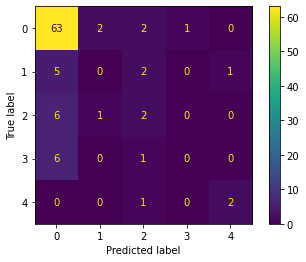

In [271]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
plt.show()

In [272]:
# # importing module
# from sklearn.linear_model import LinearRegression
# # creating an object of LinearRegression class
# LR = LinearRegression()
# # fitting the training data
# LR.fit(x_train_lda,y_train)

In [273]:
# y_prediction =  LR.predict(x_test_lda)
# y_prediction

In [274]:
# y_prediction_in =  LR.predict(x_train_lda)
# y_prediction_in

In [275]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB().fit(x_train_lda, y_train)
gnb_predictions = gnb.predict(x_test_lda)
 
# accuracy on X_test
accuracy = gnb.score(x_test_lda, y_test)
print (accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

0.6842105263157895


### Classification report

In [276]:
# confusion_matrix(y_test_class, y_pred_class)

In [277]:
y_pred

array([0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0])

In [278]:
y_test

88     0
268    0
12     0
240    2
205    0
      ..
53     0
285    2
193    0
134    0
250    0
Name: DASS_depression_severity, Length: 95, dtype: int64

#### Plot of ROC curve

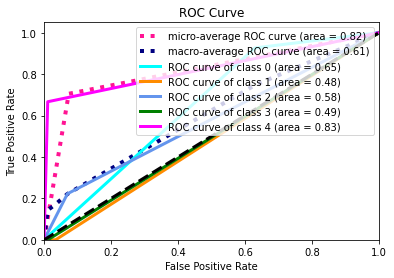

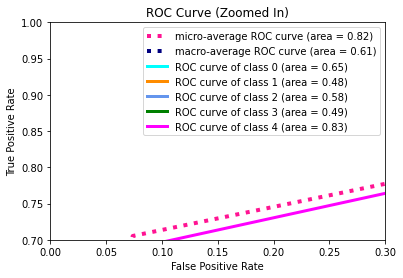

In [279]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from numpy import interp
from itertools import cycle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
ohe = OneHotEncoder(sparse=False)
ohe2 = OneHotEncoder(sparse=False)


n_classes = 5

# Plot linewidth.
lw = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()


# y_test = ohe.fit_transform(y_test.values.reshape(-1,1))
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_pred = label_binarize(y_pred, classes=[0, 1, 2, 3, 4])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.3)
plt.ylim(0.7, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Zoomed In)')
plt.legend(loc="upper right")
plt.show()

#### Area under the ROC curve

In [280]:
roc_auc_score(y_test, y_pred, multi_class = 'ovo')

0.6059246445432371

In [281]:
# # importing r2_score module
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# # predicting the accuracy score
# score_out = r2_score(y_test,y_prediction)
# score_in = r2_score(y_train, y_prediction_in)
# print("in sample score is ",score_in)
# print("out of sample score is ",score_out)
# print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
# print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

Testing

In [282]:

# gender_mapping = {0: "Male", 1: "Female"}
# marital_mapping = {0: "Married", 1: "Non-married"}
# marPb_mapping = {0: "No", 1: "Yes"}
# religionBi_mapping = {0: "Non-Muslim", 1: "Muslim"}
# religionHelp_mapping = {0: "No", 1: "Yes"}
# med_mapping = {0: "Non-medical", 1: "Medical"}
# live1_mapping = {0: "Alone", 1: "Friends/Coursemates", 2: "Family"}
# liveBi_mapping = {0: "Alone&Friends/Coursemates", 1: "Family"}
# worryFam_mapping = {0: "No", 1: "Yes"}
# routine_mapping = {0: "No", 1: "Yes"}
# stressClass_mapping = {0: "No", 1: "Yes"}
# medicalIllness_mapping = {0: "No", 1: "Yes"}
# mentalIllness_mapping = {0: "No", 1: "Yes"}
# COVID_mapping = {0: "No", 1: "Yes"}
# residence1_mapping = {0: "No", 1: "Don't know", 2: "Yes"}
# residence_mapping = {0: "No", 1: "Yes"}
# quarantine_mapping = {0: "No", 1: "Yes"}

# df["Gender"] = df["Gender"].map(gender_mapping)
# df["Marital"] = df["Marital"].map(marital_mapping)
# df["Marital_problems"] = df["Marital_problems"].map(marPb_mapping)
# df["Religion_binary"] = df["Religion_binary"].map(religionBi_mapping)
# df["Religion_help"] = df["Religion_help"].map(religionHelp_mapping)
# df["Med_or_not"] = df["Med_or_not"].map(med_mapping)
# df["Living_with1"] = df["Living_with1"].map(live1_mapping)
# df["Living_with"] = df["Living_with"].map(liveBi_mapping)
# df["Worry_family"] = df["Worry_family"].map(worryFam_mapping)
# df["Routine_loss"] = df["Routine_loss"].map(routine_mapping)
# df["Stress_class_disrupted"] = df["Stress_class_disrupted"].map(stressClass_mapping)
# df["Medical_illness"] = df["Medical_illness"].map(medicalIllness_mapping)
# df["Mental_illness"] = df["Mental_illness"].map(mentalIllness_mapping)
# df["COVID_symptoms"] = df["COVID_symptoms"].map(COVID_mapping)
# df["Residence_high_COVID1"] = df["Residence_high_COVID1"].map(residence1_mapping)
# df["Residence_high_COVID1"] = df["Residence_high_COVID1"].map(residence_mapping)
# df["Quarantine"] = df["Quarantine"].map(quarantine_mapping)

# print(pd.get_dummies(df[["Code", "Age_Numerical", "Gender","Marital", "Marital_problems",
#                          "Religion_binary","Religion_help","Med_or_not",
#                          "Expenses", "Monthly_expenses",
#                          "Living_with1","Living_with",
#                          "Worry_family","Routine_loss", "Class_hours", "Stress_class_disrupted","Medical_illness","Mental_illness",
#                          "COVID_symptoms","Residence_high_COVID1","Residence_high_COVID","Quarantine",
#                          "MSPSS_family", "MSPSS_friends", "MSPSS_significant_others"]]))
# df
